In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.


# Read the supplied sat_scores.csv file

In [2]:
filename='sat_scores.csv'
with open(filename, 'r') as f:  #Python built-in fuction to open file
    sat_raw = f.readlines()


In [3]:
print(sat_raw)   #the data is read as a list of strings

['State,Rate,Verbal,Math\n', 'CT,82,509,510\n', 'NJ,81,499,513\n', 'MA,79,511,515\n', 'NY,77,495,505\n', 'NH,72,520,516\n', 'RI,71,501,499\n', 'PA,71,500,499\n', 'VT,69,511,506\n', 'ME,69,506,500\n', 'VA,68,510,501\n', 'DE,67,501,499\n', 'MD,65,508,510\n', 'NC,65,493,499\n', 'GA,63,491,489\n', 'IN,60,499,501\n', 'SC,57,486,488\n', 'DC,56,482,474\n', 'OR,55,526,526\n', 'FL,54,498,499\n', 'WA,53,527,527\n', 'TX,53,493,499\n', 'HI,52,485,515\n', 'AK,51,514,510\n', 'CA,51,498,517\n', 'AZ,34,523,525\n', 'NV,33,509,515\n', 'CO,31,539,542\n', 'OH,26,534,439\n', 'MT,23,539,539\n', 'WV,18,527,512\n', 'ID,17,543,542\n', 'TN,13,562,553\n', 'NM,13,551,542\n', 'IL,12,576,589\n', 'KY,12,550,550\n', 'WY,11,547,545\n', 'MI,11,561,572\n', 'MN,9,580,589\n', 'KS,9,577,580\n', 'AL,9,559,554\n', 'NE,8,562,568\n', 'OK,8,567,561\n', 'MO,8,577,577\n', 'LA,7,564,562\n', 'WI,6,584,596\n', 'AR,6,562,550\n', 'UT,5,575,570\n', 'IA,5,593,603\n', 'SD,4,577,582\n', 'ND,4,592,599\n', 'MS,4,566,551\n', 'All,45,506,514\

In [4]:
sat_cols=sat_raw[0].replace('\n','').split(',')  #extract column names and form the list sat_cols
print(sat_cols)

['State', 'Rate', 'Verbal', 'Math']


In [5]:
#initialize the dictionary that is going to store the data from sat_raw where the keys are the column names in sat_cols
sat_data={x:[] for x in sat_cols}  
sat_data

{'Math': [], 'Rate': [], 'State': [], 'Verbal': []}

In [6]:
sat_data.keys()

dict_keys(['State', 'Rate', 'Verbal', 'Math'])

In [7]:
for irow in range(1,len(sat_raw)):
    newrow=sat_raw[irow].replace('\n','').split(',')
    for i,key in enumerate(newrow):
        sat_data[sat_cols[i]].append(newrow[i])
print(sat_data)       

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

In [8]:
df_sat=pd.DataFrame(sat_data)   #pandas built-in function to convert sat_data with dictionary
#format to DataFrame object
type(df_sat)

pandas.core.frame.DataFrame

In [9]:
df_sat.head()

,Math,Rate,State,Verbal
0,510,82,CT,509
1,513,81,NJ,499
2,515,79,MA,511
3,505,77,NY,495
4,516,72,NH,520


In [10]:
df_sat.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object

In [11]:
#Pandas built-in function to open and read file and returns a pandas DataFrame object
df_sat_pd=pd.read_csv(filename,sep=',',usecols=sat_cols,index_col=None) 
df_sat_pd.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [12]:
df_sat_pd.dtypes  

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

Apparently when deploy Pandas built-in function to read the file the data type of the columns will be the same as that in csv file. however, if the dataframe object is converted from the dictionary whose columns are of type 'object' then these columns are still 'object' type in dataframe

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [13]:
df_sat_pd.head(10)  #display the first 10 rows 

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


These data look like SAT results across United States.'State' contains two-letter initial of state name, 'Verbal','Math' refer to the scores of two subjects. 'Rate' is a sort of assessment result in numbers. 

In [14]:
df_sat_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


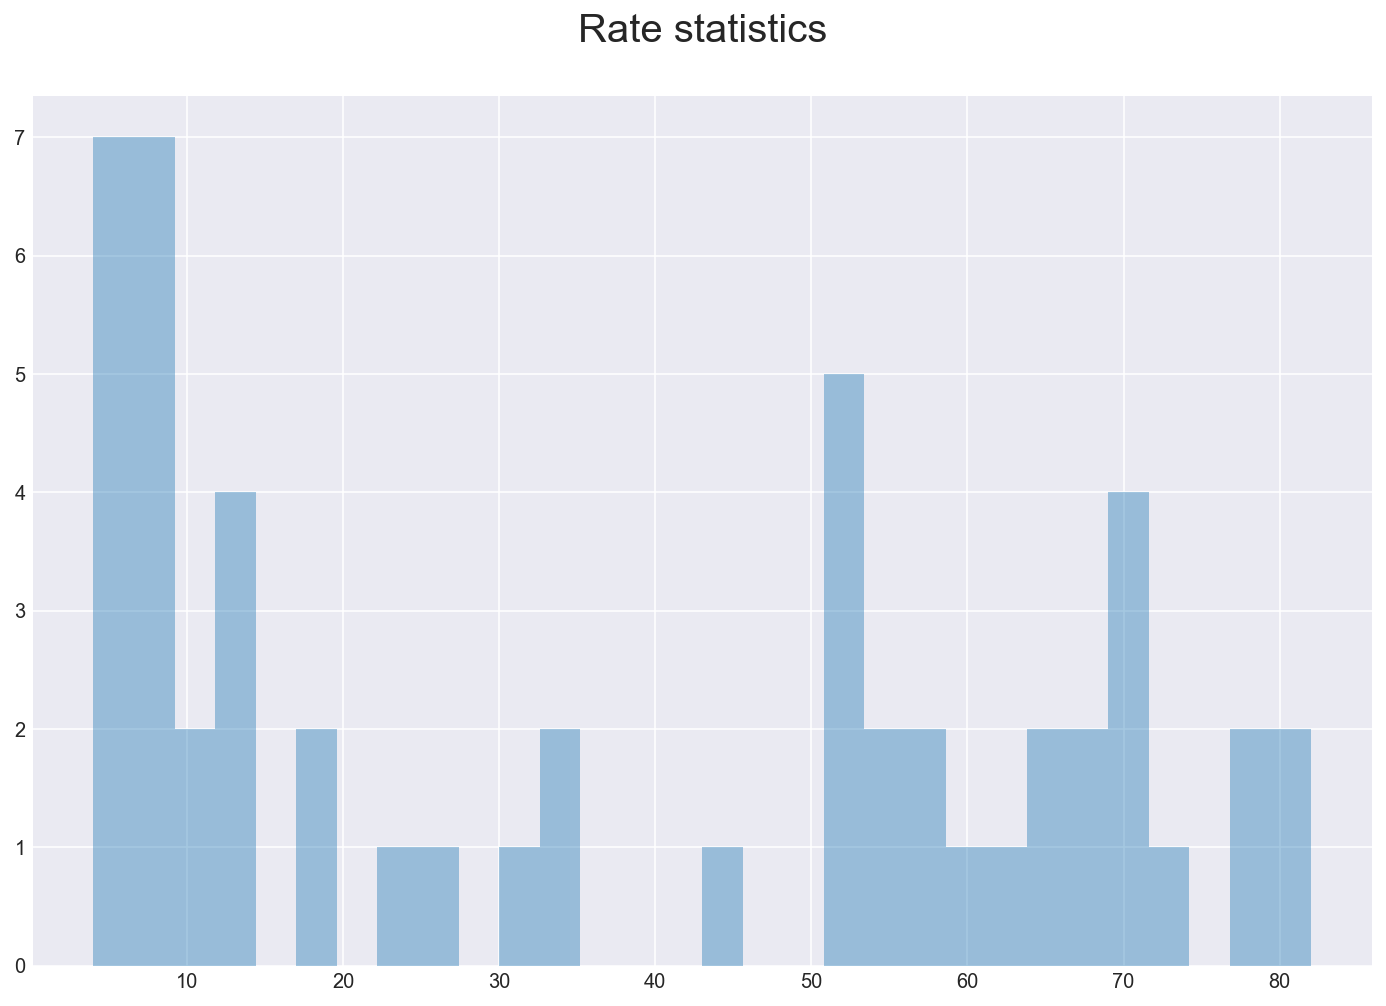

In [15]:
rate = df_sat_pd.Rate.values
fig = plt.figure(figsize=(12,8))
ax = fig.gca()

ax = sns.distplot(rate, bins=30, kde=False)
ax.set_title('Rate statistics\n', fontsize=20)
plt.show()

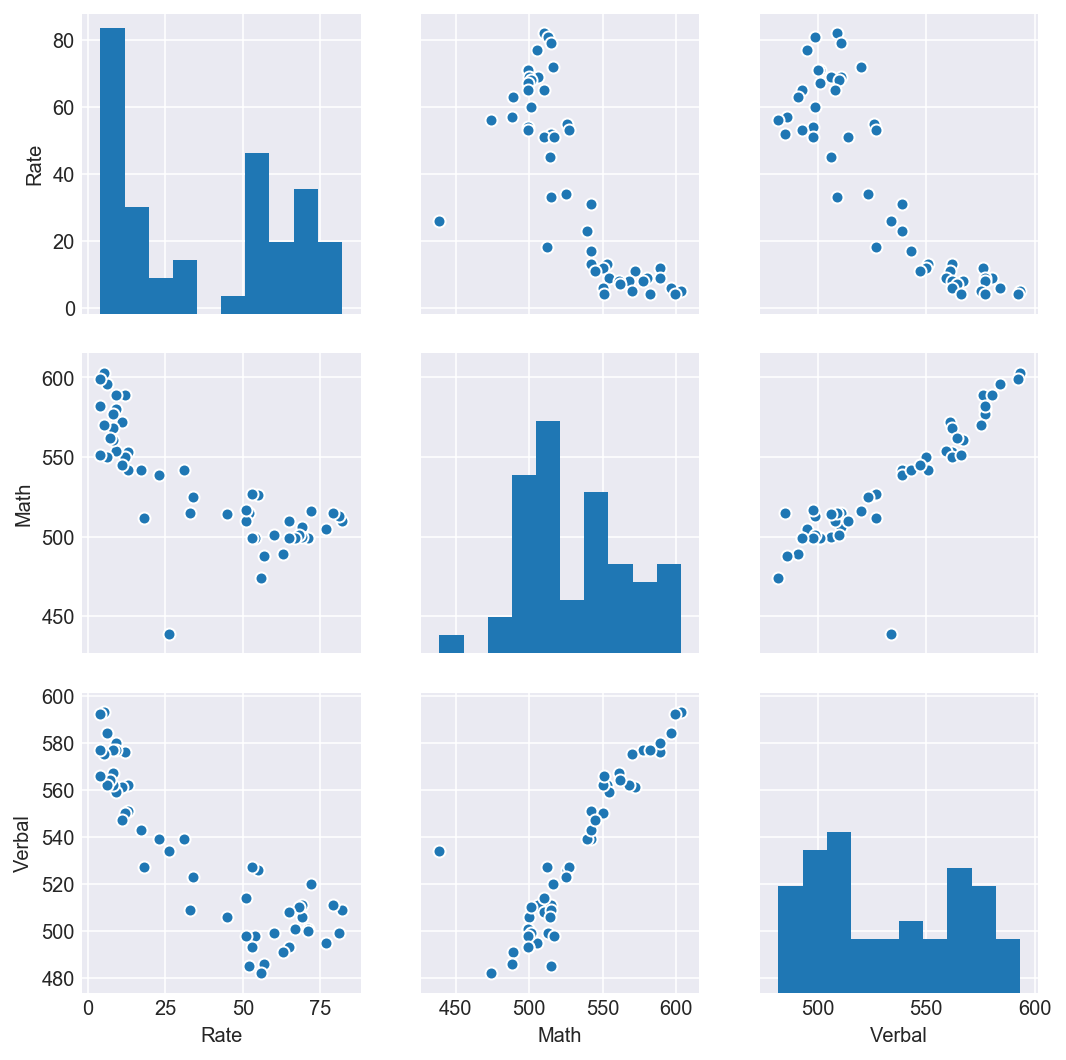

In [16]:
sns.pairplot(df_sat_pd[['Rate','Math','Verbal']])

the pair plots display how one variable correlates to the other. Between Math and Verbal there is a strong positive linear correlation. Between Math and Rate, Verbal and Rate, there are negative linear correlation with slightly weaker strength.

# Plot the data using built-in pandas functions.

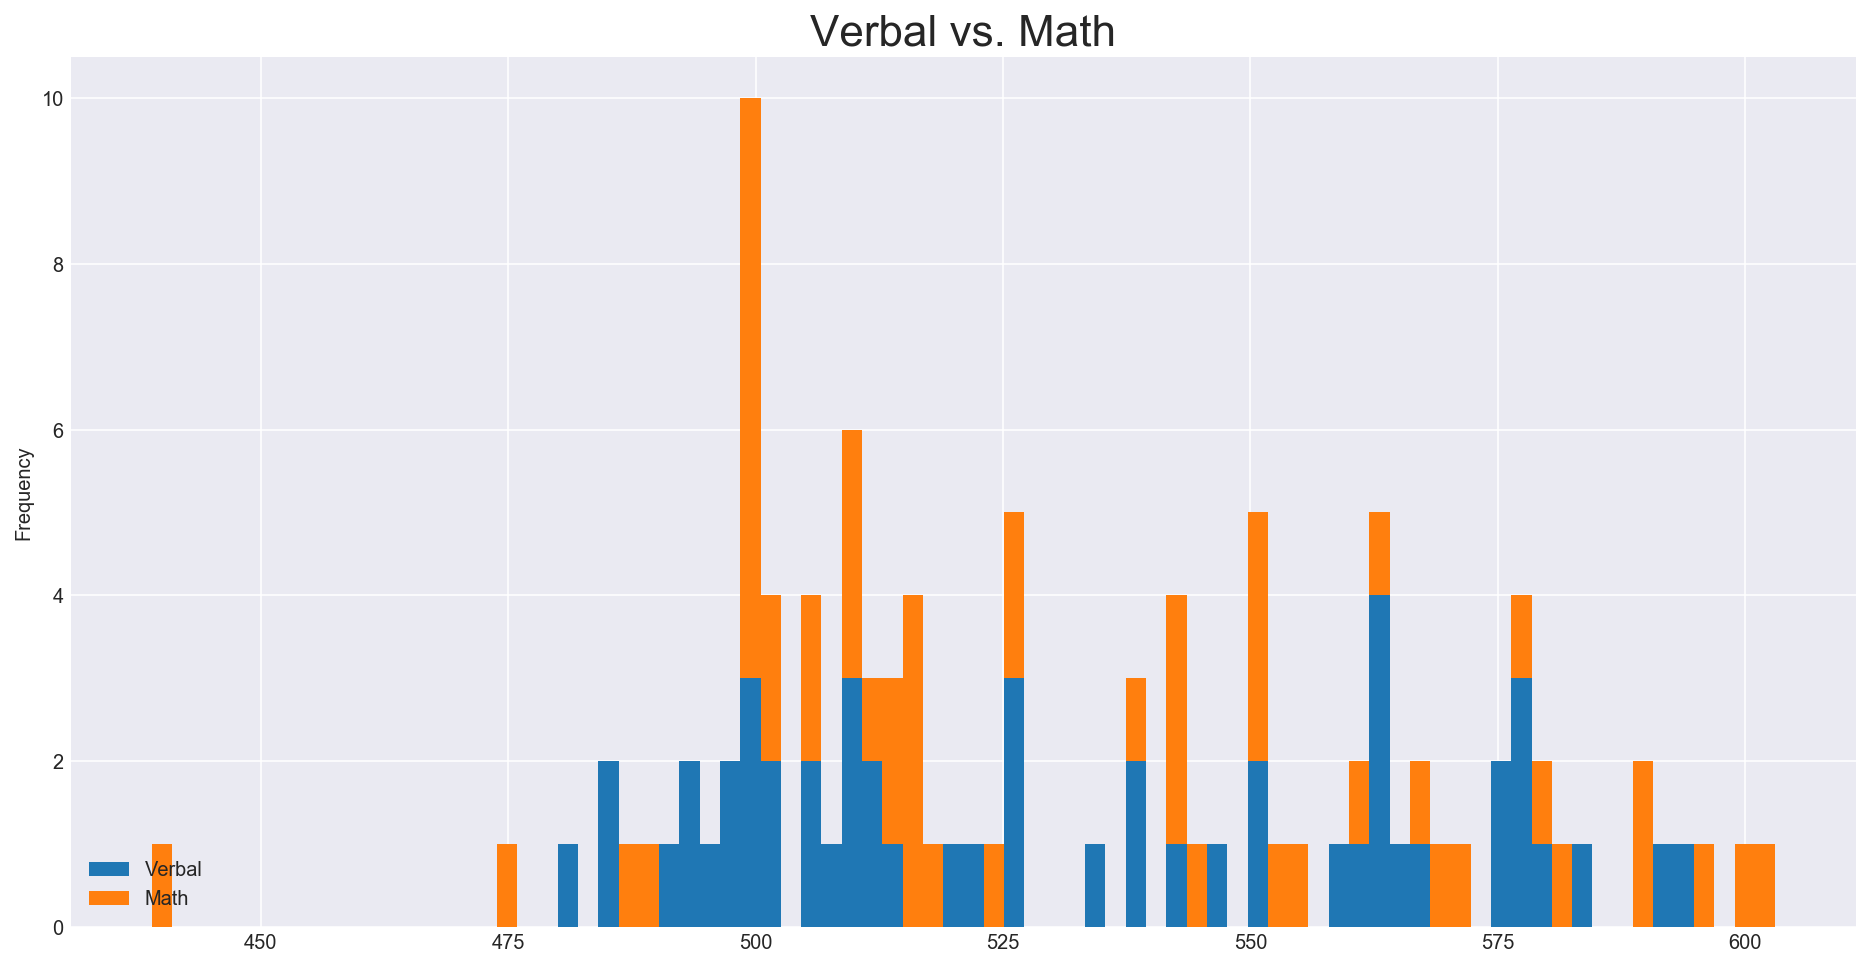

In [17]:
ax = df_sat_pd[['Verbal','Math']].plot(kind='hist',bins=80, stacked=True, figsize=(16,8))
ax.set_title('Verbal vs. Math', fontsize=22)
ax.legend(loc=3)

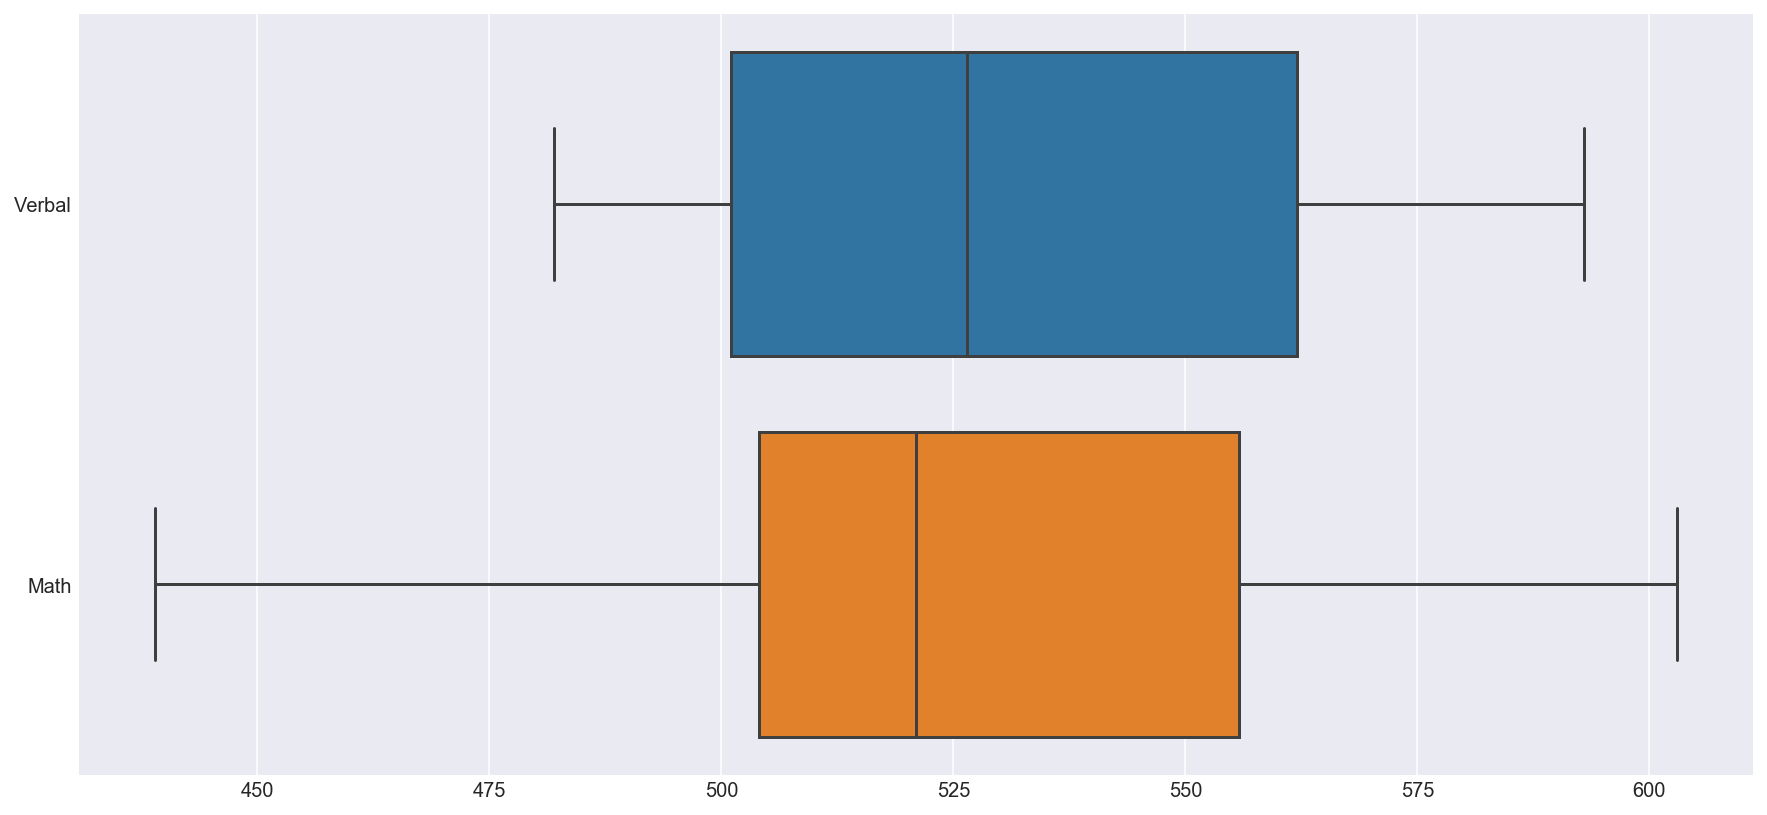

In [18]:
fig = plt.figure(figsize=(15, 7))
ax = fig.gca()

ax = sns.boxplot(data=df_sat_pd[['Verbal','Math']], orient='h',ax=ax)
plt.show()

In [19]:
df_sat_pd.mean()

Rate       37.153846
Verbal    532.019231
Math      531.500000
dtype: float64

As 'Math'/'Verbal' values are about 15 times of 'Rate'. To place these three variables on the same boxplot chart, they have to be standardized.

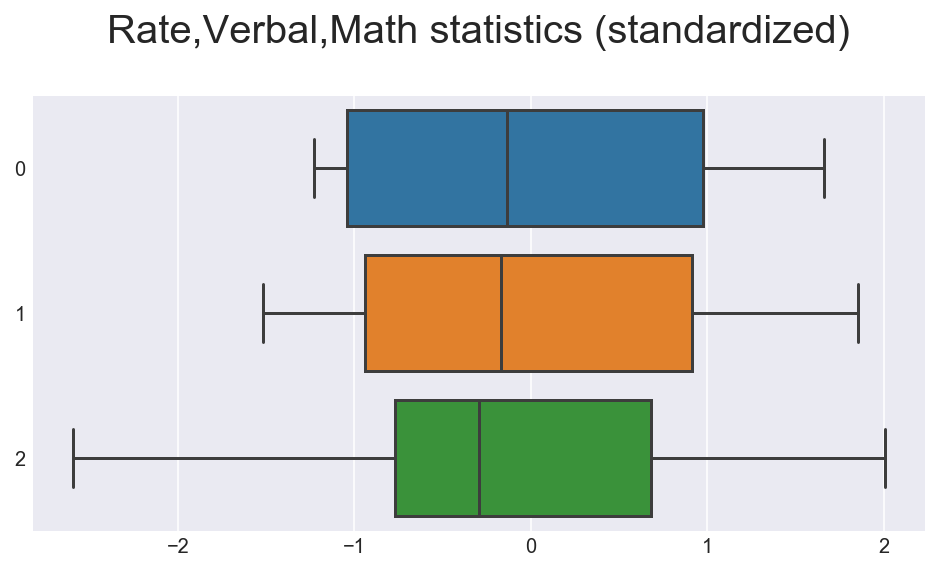

In [21]:
verbal = df_sat_pd.Verbal.values
math=df_sat_pd.Math.values
rate_mean = np.mean(rate)
rate_std = np.std(rate)
rate_stand = (rate - rate_mean) / rate_std

verbal_mean = np.mean(verbal)
verbal_std = np.std(verbal)
verbal_stand = (verbal - verbal_mean) / verbal_std

math_mean = np.mean(math)
math_std = np.std(math)
math_stand = (math - math_mean) / math_std

fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.boxplot(data=[rate_stand,verbal_stand,math_stand], orient='h')
ax.set_title('Rate,Verbal,Math statistics (standardized)\n', fontsize=20)


plt.show()

# Create the correlation matrix of the variables (excluding `State`)


In [22]:
df_sat_pd[['Rate','Verbal','Math']].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


The correlation between Rate and Verbal is negative and strong, and so is between Rate and Math. However, Verbal and Math have positive and stronger correlation. This told me that the students in each state are either good at both Verbal and Math or poor at both. And the state which has high Rate is likely to have lower scores in Verbal and Math.  

# Use pandas'  `.describe()` built-in function on the DataFrame

In [23]:
df_sat_pd.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


count: there are 52 rows 
mean: list of mean values of columns 'rate','verbal','math' and 'verbal' score-'math' score
std: list of the standard deviations of columns 'rate','verbal','math' and 'verbal' score-'math' score
min: list of the minimum values of columns 'rate','verbal','math' and 'verbal' score-'math' score
25%: list of the first quartile values of columns 'rate','verbal','math' and 'verbal' score-'math' score
50%: list of the second quartile values of columns 'rate','verbal','math' and 'verbal' score-'math' score
75%: list of the third quartile values of columns 'rate','verbal','math' and 'verbal' score-'math' score
max: list of the maximum values of columns 'rate','verbal','math' and 'verbal' score-'math' score

# Assign and print the _covariance_ matrix for the dataset

The covariance matrix measure how much the variables related to each other. Each element in the matrix reflects the "related" level between two variable X, Y or one variable X itself. Its value is the sum of deviations from the mean of 
X times deviations from the mean of Y adjusted by the sample size N. The formula is:
cov(x,y)=sum((xi-xmean)*(yi-ymean))/N,i=1,2,...N
cov(x,x)=sum(xi-xmean)**2/N,i=1,2,...N
As seen, covariance's value depends on the variance of the variables. It is hard to interprete or compare with other covariance. 

When the element cov(x,y) in the covariance matrix is devided by the product of standard deviation of variable x and y or cov(x,x) is devided by the variance of x, the pearson correlation matrix is formed. Compared to covariance matrix, correlation matrix is indepedent of variance of variables. Each element's value ranges between -1 and 1. Therefore it is eaiser to interprete and compare.



In [24]:
Rate_Verbal_cov = np.sum((rate - np.mean(rate))*(verbal - np.mean(verbal)))/len(rate)

Rate_Rate_cov=np.sum((rate - np.mean(rate))**2)/len(rate)
Verbal_Verbal_cov=np.sum((verbal - np.mean(verbal))**2)/len(rate)

print([Rate_Rate_cov,Rate_Verbal_cov],[Rate_Verbal_cov,Verbal_Verbal_cov])

[731.0532544378698, -788.8875739644972] [-788.8875739644972, 1083.403476331361]


In [25]:
Rate_Verbal_cor=Rate_Verbal_cov/(rate.std()*verbal.std())
Verbal_Verbal_cor=Verbal_Verbal_cov/(verbal.std())**2
Rate_Rate_cor=Rate_Rate_cov/(rate.std())**2
print([Rate_Rate_cor,Rate_Verbal_cor],[Rate_Verbal_cor,Verbal_Verbal_cor])                        

[1.0, -0.8864321428755697] [-0.8864321428755697, 1.0000000000000002]


In [26]:
print(np.cov(rate, verbal, bias=True))
print(np.corrcoef(rate,verbal,bias=True))

[[ 731.05325444 -788.88757396]
 [-788.88757396 1083.40347633]]
[[ 1.         -0.88643214]
 [-0.88643214  1.        ]]


C:\Users\sunny\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: bias and ddof have no effect and are deprecated
  


the covariance matrix and the correlation matrix calculated from covariance matrix are the same as that from the numpy built-in function

# Dealing with outliers


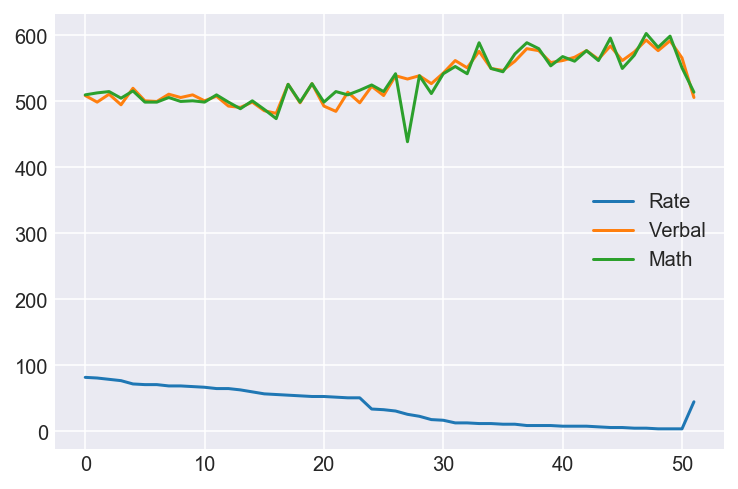

In [27]:
df_sat_pd.plot()

In [28]:
df_sat_pd.Rate.max()

82

In [29]:
df_sat_pd.Rate.min()

4

In [30]:
df_sat_pd.Rate.mean()

37.15384615384615

In [31]:
df_sat_pd.Rate.std()

27.301788072869286

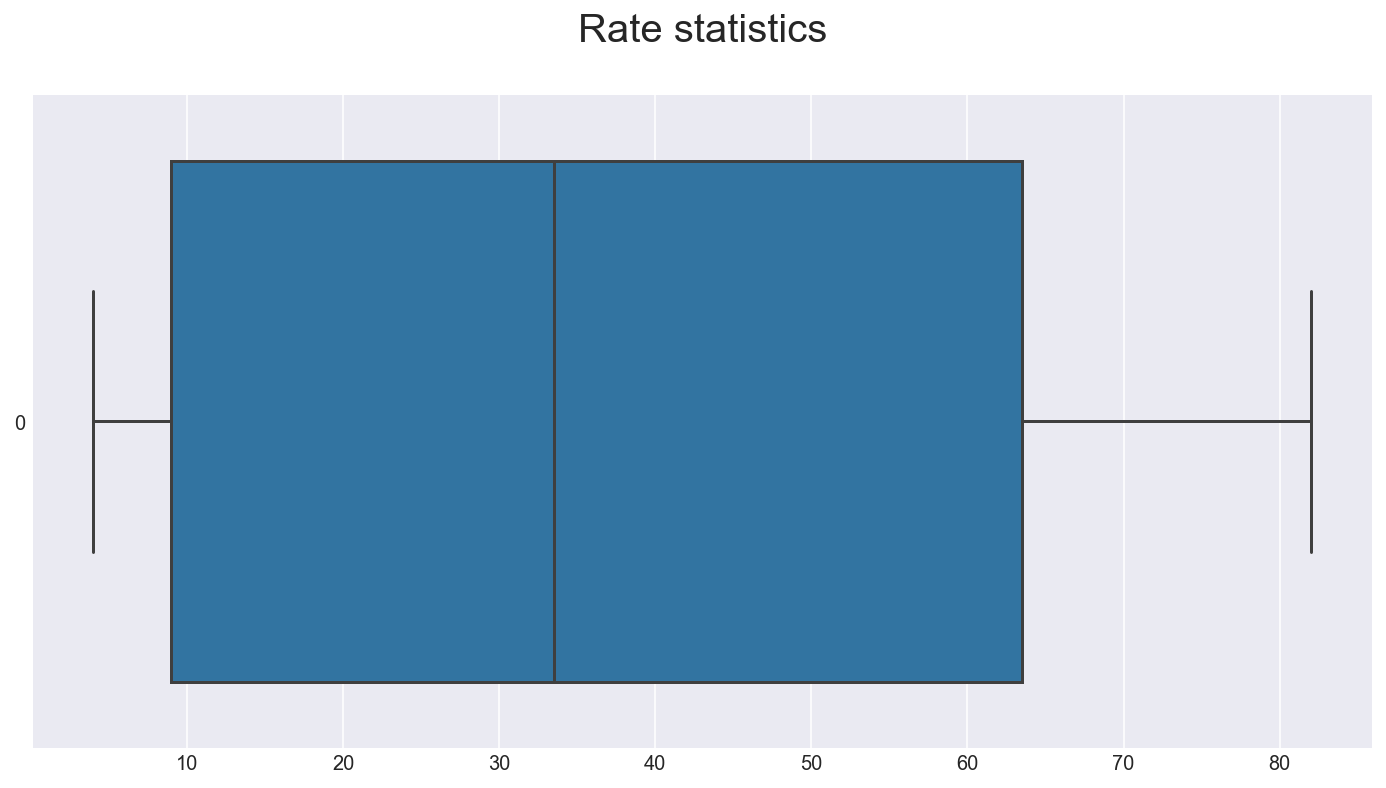

In [32]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=rate, orient='h')

ax.set_title('Rate statistics\n',fontsize=20)
plt.show()

There isn't any outlier.

# Calculate the spearman correlation of sat `Verbal` and `Math`

In [33]:
corr_pearson=df_sat_pd[['Verbal','Math']].corr()
corr_pearson

,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


In [34]:
corr_spearman=df_sat_pd[['Verbal','Math']].corr(method='spearman')
corr_spearman

,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the ranked variables.In this case, 'Verbal','Math' variables should be converted to ranked variables 'rVerbal' and 'rMath' and then to calculate the pearson correlation coefficient of these two ranked variables.